In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import plotly.express as px
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from matplotlib.pyplot import figure, show
import numpy as np

In [2]:
df = pd.read_csv('toy_dataset.csv')

In [3]:
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.dtypes

number       int64
city        object
gender      object
age          int64
income     float64
illness     object
dtype: object

In [7]:
df.isnull().sum()

number     0
city       0
gender     0
age        0
income     0
illness    0
dtype: int64

In [8]:
df.describe()

,number,age,income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [9]:
df.duplicated().sum()

0

**Так как в датасете отсутствуют пропуски, заменим на пропуски часть значений в одном категориальном и одном количественном признаке.**

**Категориальный:**

In [10]:
df['city'].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [11]:
df = df.replace(['Austin'], None)

In [12]:
df

,number,city,gender,age,income,illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,None,Male,48,93669.0,No
149996,149997,None,Male,25,96748.0,No
149997,149998,None,Male,26,111885.0,No
149998,149999,None,Male,25,111878.0,No


Нахождение пропусков у полей с типами object

In [13]:
cat_cols = []
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка city. Тип данных object. Количество пустых значений 12292.


In [14]:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [15]:
a = df[['city']]
a.head()

imp2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
df_imp2 = imp2.fit_transform(a)
df_imp2


array([['Dallas'],
       ['Dallas'],
       ['Dallas'],
       ...,
       [None],
       [None],
       [None]], dtype=object)

In [16]:
col = ['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', None]
for i in col:
    k = df_imp2[df_imp2==i].size
    print('К в по {} равно {}'.format(i,k))

К в по Dallas равно 19707
К в по New York City равно 50307
К в по Los Angeles равно 32173
К в по Mountain View равно 14219
К в по Boston равно 8301
К в по Washington D.C. равно 8120
К в по San Diego равно 4881
К в по None равно 12292


Количество пропусков ~10%. Не до конца логично будет заполнять их наиболее часто встречающимися значениями, поэтому заменим их на Unknown, чтобы избежать дальнейшего возможного искажения данных

In [17]:
df['city']= df['city'].fillna('Unknown')

**Количественный:**

Добавим новый столбец

In [18]:
dt = pd.read_csv('/Аринина/Swiggy_50.csv', sep=",") 

In [19]:
df['rating'] = dt['Rating']

In [20]:
total_count = df.shape[0]

In [21]:
num_cols =[]
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка rating. Тип данных float64. Количество пустых значений 135862.


In [22]:
df_num = df[num_cols]
df_num

,rating
0,3.9
1,4.3
2,4.0
3,4.2
4,4.1
...,...
149995,NaN
149996,NaN
149997,NaN
149998,NaN


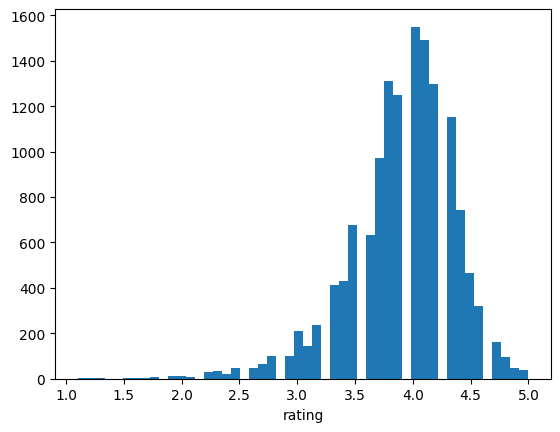

In [23]:
for col in df_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

Заполним пропуски медианными значениями

In [24]:
df['rating'] = df['rating'].fillna(df['rating'].median())

**Диаграмма рассеивания**

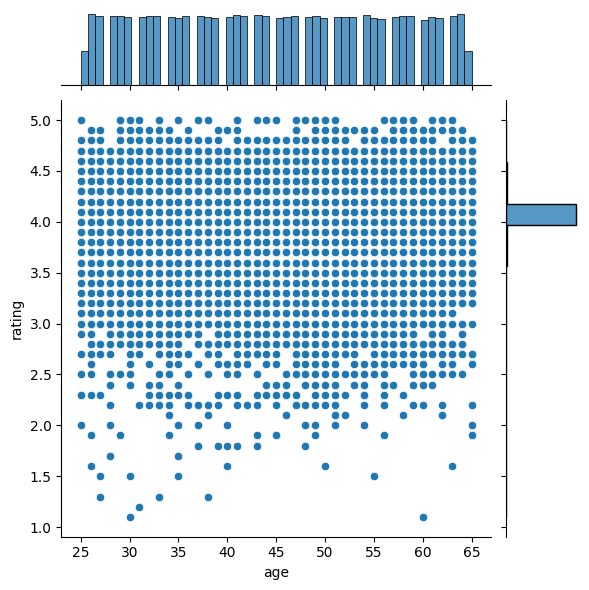

In [29]:
sns.jointplot(y='rating', x='age', data=df)
plt.show()

In [30]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_9508\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,number,age,income,rating
number,1.000000,-0.003448,0.410460,0.069657
age,-0.003448,1.000000,-0.001318,0.003671
income,0.410460,-0.001318,1.000000,0.028353
rating,0.069657,0.003671,0.028353,1.000000


Видна небольшая корелляция между income и number